<a href="https://colab.research.google.com/github/usamanisar20/usamanisar20/blob/main/ODLAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  %tensorflow_version 1.x
  import keras
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.wrappers.scikit_learn import KerasClassifier

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5.0,5.0)

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
#Read the data
path = '/drive/My Drive/White Wine Quality.csv'
df = pd.read_csv(path)
df.head()

#convert it into pandas dataframe
df = pd.DataFrame(df)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0.0,2.0,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1.0,3.0,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1.0,2.0,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0.0,2.0,1


age, there are 0 outliers
trestbps, there are 30 outliers
chol, there are 16 outliers
thalach, there are 4 outliers
oldpeak, there are 7 outliers
age outliers removed
trestbps outliers removed
chol outliers removed
thalach outliers removed
oldpeak outliers removed


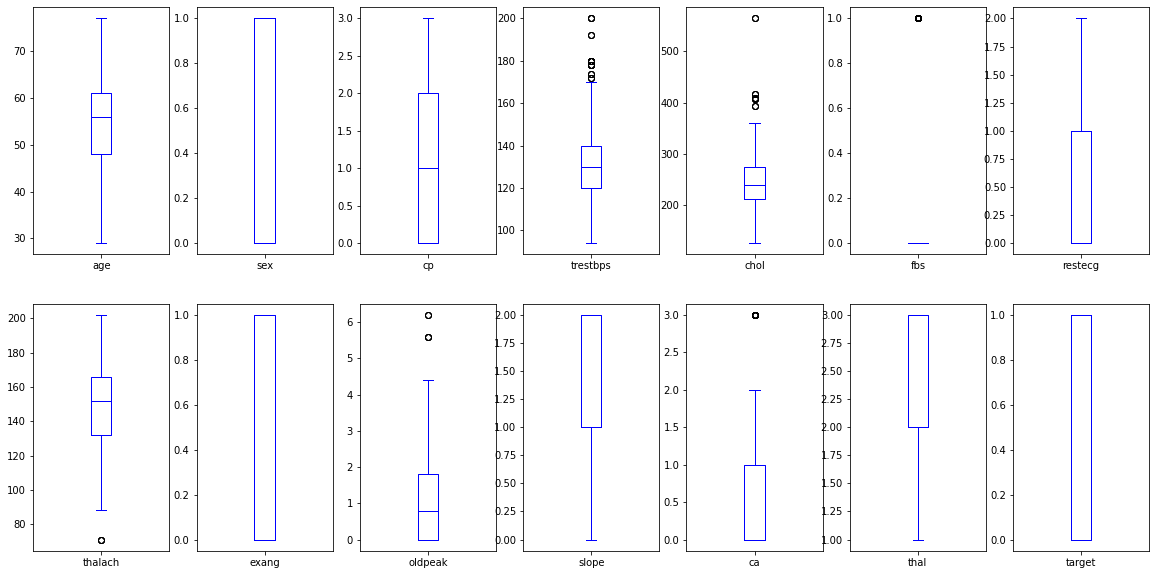

In [ ]:
df['ca'].unique()
df[df['ca'] == 4]
df.loc[df['ca'] == 4, 'ca'] = np.NaN

df.thal.value_counts()
df.loc[df['thal'] == 0, 'thal'] = np.NaN
df[df['thal'] == 0]
df['thal'].unique()

df.isnull().sum()

df = df.fillna(df.median())

df.plot(kind = 'box', subplots = True, layout = (2,7),
sharex = False, sharey = False, figsize = (20, 10), 
color = 'blue');
        
continuous_var = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_o, drop = False):
    for i in df_o.columns: #for each attribute 
        f_data = df_o[i]
        Q1 = np.percentile(f_data, 25.) # 25th percentile
        Q3 = np.percentile(f_data, 75.) # 75th percentile
        IQR = Q3-Q1 # Interquartile
        k = IQR * 1.5
        outliers = f_data[~((f_data >= Q1 - k) & (f_data <= Q3 + k))].index.tolist()  
        if not drop:
            print('{}, there are {} outliers'.format(i, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('{} outliers removed'.format(i))

outliers(df[continuous_var])

outliers(df[continuous_var], drop=True)

In [ ]:
# Define the Target (dependent variable) and features (independent variables)
X = df.drop('target', axis = 1)
Y = df['target']

In [ ]:
#Find the correlation 
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.07,-0.07,0.27,0.19,0.11,-0.13,-0.40,0.09,0.21,-0.16,0.39,0.06,-0.23
sex,-0.07,1.00,-0.08,-0.01,-0.12,0.05,-0.07,-0.05,0.18,0.15,-0.06,0.12,0.23,-0.32
cp,-0.07,-0.08,1.00,0.08,-0.10,0.07,0.07,0.30,-0.40,-0.17,0.12,-0.22,-0.18,0.42
trestbps,0.27,-0.01,0.08,1.00,0.11,0.13,-0.16,-0.06,-0.01,0.12,-0.07,0.09,-0.01,-0.10
chol,0.19,-0.12,-0.10,0.11,1.00,0.03,-0.12,-0.05,0.08,0.03,0.00,0.16,0.07,-0.13
fbs,0.11,0.05,0.07,0.13,0.03,1.00,-0.10,-0.02,0.03,0.01,-0.06,0.14,-0.05,-0.04
restecg,-0.13,-0.07,0.07,-0.16,-0.12,-0.10,1.00,0.09,-0.10,-0.04,0.08,-0.10,0.01,0.16
thalach,-0.40,-0.05,0.30,-0.06,-0.05,-0.02,0.09,1.00,-0.39,-0.35,0.39,-0.31,-0.13,0.43
exang,0.09,0.18,-0.40,-0.01,0.08,0.03,-0.10,-0.39,1.00,0.33,-0.26,0.16,0.22,-0.43
oldpeak,0.21,0.15,-0.17,0.12,0.03,0.01,-0.04,-0.35,0.33,1.00,-0.53,0.30,0.16,-0.45


In [ ]:
#Split data into train and test
import scipy.stats
from keras.utils import to_categorical
X = df.drop(['target', 'chol', 'fbs','trestbps', 'restecg'], axis = 1)
Y = df['target']
Y = to_categorical(Y)
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(774, 9)
(194, 9)
(774, 2)
(194, 2)


In [ ]:
#Define model
def create_model(hidden_layer, hidden_activation, output_activation):
  model = Sequential()
  model.add(Dense(hidden_layer,input_dim = 9,activation = hidden_activation))
  model.add(Dense(2,activation = output_activation))
  model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
estimator_model = KerasClassifier(build_fn = create_model, epochs = 10, batch_size = 10, verbose = 0)

In [ ]:
params = {
    'hidden_layer' : [100, 150, 200, 250],
    'hidden_activation' : ['relu', 'softmax', 'sigmoid'],
    'output_activation' : ['relu', 'softmax', 'sigmoid']
}

grid = GridSearchCV(estimator = estimator_model, param_grid = params, n_jobs = -1, cv = 3)
best_grid = grid.fit(X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
best_grid.best_params_

{'hidden_activation': 'relu',
 'hidden_layer': 100,
 'output_activation': 'softmax'}

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim = 9,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 202       
Total params: 1,202
Trainable params: 1,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,epochs=10,batch_size=100)

Epoch 1/10
774/774 [==============================] - 0s 231us/step - loss: 2.2116 - accuracy: 0.4289
Epoch 2/10
774/774 [==============================] - 0s 23us/step - loss: 1.1527 - accuracy: 0.4225
Epoch 3/10
774/774 [==============================] - 0s 23us/step - loss: 0.7854 - accuracy: 0.5026
Epoch 4/10
774/774 [==============================] - 0s 22us/step - loss: 0.6356 - accuracy: 0.6150
Epoch 5/10
774/774 [==============================] - 0s 21us/step - loss: 0.5925 - accuracy: 0.6615
Epoch 6/10
774/774 [==============================] - 0s 19us/step - loss: 0.5874 - accuracy: 0.6899
Epoch 7/10
774/774 [==============================] - 0s 20us/step - loss: 0.5532 - accuracy: 0.7028
Epoch 8/10
774/774 [==============================] - 0s 18us/step - loss: 0.5555 - accuracy: 0.7003
Epoch 9/10
774/774 [==============================] - 0s 20us/step - loss: 0.5152 - accuracy: 0.7183
Epoch 10/10
774/774 [==============================] - 0s 19us/step - loss: 0.4965 - accur

In [ ]:
loss, acc = model.evaluate(X_test,Y_test)
acc

194/194 [==============================] - 0s 667us/step


0.7525773048400879

In [ ]:
history = model.fit(X_train,Y_train, epochs=10,
                   batch_size=100,
                   validation_data=(X_test,Y_test))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

Train on 774 samples, validate on 194 samples
Epoch 1/10
774/774 [==============================] - 0s 30us/step - loss: 0.4834 - accuracy: 0.7545 - val_loss: 0.4795 - val_accuracy: 0.7577
Epoch 2/10
774/774 [==============================] - 0s 26us/step - loss: 0.4783 - accuracy: 0.7558 - val_loss: 0.4871 - val_accuracy: 0.7320
Epoch 3/10
774/774 [==============================] - 0s 25us/step - loss: 0.4619 - accuracy: 0.7855 - val_loss: 0.4446 - val_accuracy: 0.8041
Epoch 4/10
774/774 [==============================] - 0s 22us/step - loss: 0.4514 - accuracy: 0.7817 - val_loss: 0.4261 - val_accuracy: 0.7990
Epoch 5/10
774/774 [==============================] - 0s 24us/step - loss: 0.4422 - accuracy: 0.7894 - val_loss: 0.4226 - val_accuracy: 0.8299
Epoch 6/10
774/774 [==============================] - 0s 23us/step - loss: 0.4365 - accuracy: 0.8165 - val_loss: 0.4108 - val_accuracy: 0.8299
Epoch 7/10
774/774 [==============================] - 0s 25us/step - loss: 0.4345 - accuracy: 0.

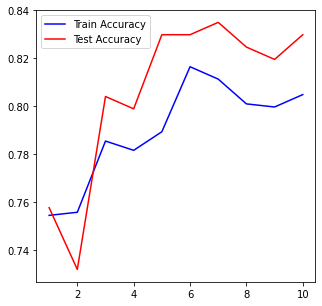

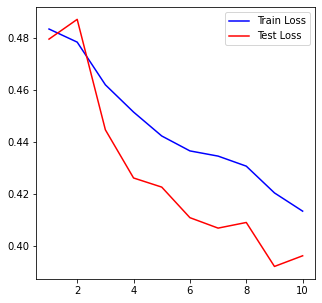

In [ ]:
plt.plot(epochs, acc,'b',label = 'Train Accuracy')
plt.plot(epochs, val_acc,'r',label = 'Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'b',label = 'Train Loss')
plt.plot(epochs, val_loss,'r',label = 'Test Loss')
plt.legend()
plt.show()

In [ ]:
predict = model.predict_classes(X_test)
maxarg = np.argmax(Y_test, axis = 1)
class_no = 2
from sklearn.metrics import classification_report
names = ["Class {}".format(i) for i in range(class_no)]
print(classification_report(maxarg, predict, target_names=names))

              precision    recall  f1-score   support

     Class 0       0.90      0.67      0.77        82
     Class 1       0.80      0.95      0.87       112

    accuracy                           0.83       194
   macro avg       0.85      0.81      0.82       194
weighted avg       0.84      0.83      0.82       194



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_predict = model.predict(X_test)
confu_mat = confusion_matrix(Y_predict,Y_test)
plt.figure(figsize = (10,10))
sns.heatmap(confu_mat, annot = True) 

ValueError: ignored